# Start

# Fidelity calculator check

In [1]:
def comparator(a,b):
    if len(a) != len(b):
        print 'size is different'
        return False
    for i in range(len(a)):
        if a[i] != b[i]:
            return False
    return True


def crop_fluctuations(re_g, im_g, re_e,im_e, void_re, void_im, coeff_shift = 2.0, crop=True):
    '''
    takes re_g, im_g, re_e, im_e data
    finds the main area
    returns values of limits [leftlim, rightlim, toplim, bottomlim]
    coeff_shift - how many std-values shift from mean-value
    '''
    if crop:
        ## for X axis
        re_g_m = np.mean(re_g)     #mean value of g
        re_g_d = np.std(re_g)       #dispersion value of g
        re_e_m = np.mean(re_e)
        re_e_d = np.std(re_e)
        ## for Y axis
        im_g_m = np.mean(im_g)     #mean value of g
        im_g_d = np.std(im_g)       #dispersion value of g
        im_e_m = np.mean(im_e)
        im_e_d = np.std(im_e)
        ### possible X(re) limits
        re1 = re_g_m + re_g_d * coeff_shift
        re2 = re_g_m - re_g_d * coeff_shift
        re3 = re_e_m + re_e_d * coeff_shift
        re4 = re_e_m - re_e_d * coeff_shift
        ### possible Y(im) limits
        im1 = im_g_m + im_g_d * coeff_shift
        im2 = im_g_m - im_g_d * coeff_shift
        im3 = im_e_m + im_e_d * coeff_shift
        im4 = im_e_m - im_e_d * coeff_shift

        leftlim = np.min([ re1,re2,re3,re4, 0, void_re])
        rightlim = np.max([ re1,re2,re3,re4, 0, void_re ])
        toplim = np.max([ im1,im2,im3,im4, 0, void_im ])
        bottomlim = np.min([ im1,im2,im3,im4, 0, void_im ])
    else:
        leftlim = np.min([ re_e, re_g, 0 ])
        rightlim = np.max([ re_e, re_g, 0 ])
        toplim = np.max([ im_e, im_g, 0 ])
        bottomlim = np.min([ im_e, im_g, 0 ])

    return [leftlim, rightlim, toplim, bottomlim]

# Create M2

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from lib_SSResult import SSResult## This data we will use
# from lib_SSResult import Histogram


filename2 = '193544_SingleShot.dat'
paramfile2 = '193544_parameters_Fidelity190722_193544.dat'
m2 = SSResult(filename2, paramfile=paramfile2)
pic = m2.plot_scatter_two_blob(dark=True)

Object is created
Distance:0.03; Theta:26
Amp:0.02; Phase:-155
Amp:0.01; Phase:27
Ratio amps: 0.75


/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family [u'Verdana'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


## Normalize data

In [3]:
m2.make_norm_data_from_raw()

data was normalised and saved


True

## Ok. Data is normalised. Use only Re part (so called x)

## Now work with threshold

In [4]:
m2.set_best_threshold()
print '\n THREHSOLD:', m2.threshold

arg best: 20
best fidelity:  0.9224
ONE MORE ITTERATION
arg best: 21
best fidelity:  0.9228
ONE MORE ITTERATION
arg best: 33
best fidelity:  0.92295
ONE MORE ITTERATION
threshold: 0.0028118520227441886

 THREHSOLD: 0.0028118520227441886


In [5]:
SHIFT_DATA = False
# SHIFT_DATA = True

In [6]:
if SHIFT_DATA:
    print m2.threshold
    m2.reset_x_threshold_tobe_zero()
    print m2.threshold

# Work on gaussian

# ALL FIT STARTS HERE

### new method with numpy.histogram

In [7]:
import numpy as np
from matplotlib import pyplot as plt
from lib_SSResult import SSResult## This data we will use

filename2 = '193544_SingleShot.dat'
paramfile2 = '193544_parameters_Fidelity190722_193544.dat'
m2 = SSResult(filename2, paramfile=paramfile2)


m2.make_norm_data_from_raw()
m2.set_best_threshold()

Object is created
data was normalised and saved
arg best: 20
best fidelity:  0.9224
ONE MORE ITTERATION
arg best: 21
best fidelity:  0.9228
ONE MORE ITTERATION
arg best: 33
best fidelity:  0.92295
ONE MORE ITTERATION
threshold: 0.0028118520227441886


0.0028118520227441886

# Fiting in SSresult

In [8]:
m2.make_histograms()

True

regime: raw_data_and_pre


/usr/lib/python2.7/dist-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


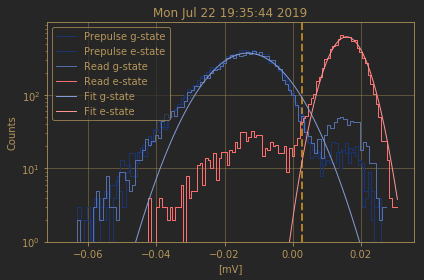

In [9]:
pic = m2.plot_hists(regime='raw_data_and_pre')


# Postselection

True

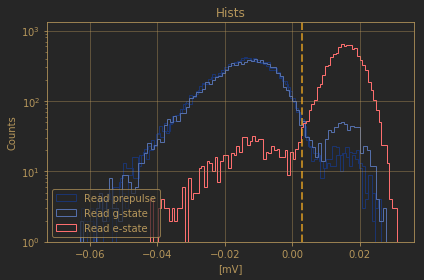

In [12]:
[list_g_wrong, list_e_wrong] = m2.make_postselected_data_from_norm()
pic = m2.plot_hist_1D(plot_raw_not_sel=True, plot_pre_data=True)
# pic = m2.plot_hist_1D(plot_raw_not_sel=False, plot_pre_data=False, title_str='Selected')


# Repeat make_hists (for buil hists of postselection)

regime: selected


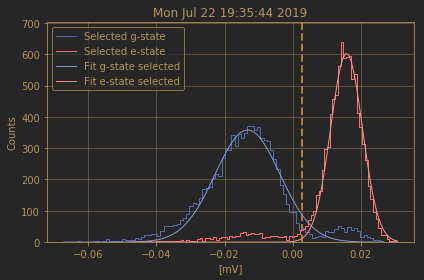

In [13]:
m2.make_histograms()
pic = m2.plot_hists(regime='selected',log=False)

regime: raw_data


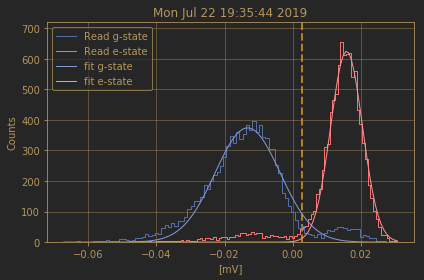

In [14]:
pic = m2.plot_hists(log=False)

regime==raw_and_selected


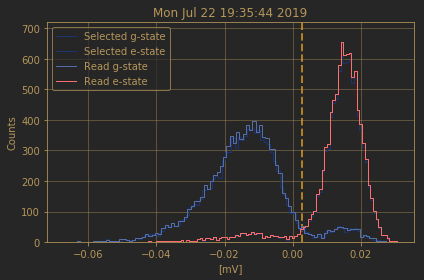

In [18]:
pic = m2.plot_hists(regime='raw_and_selected', log=False)